In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import numpy as np # data analysis
import pandas as pd # mathematical functions,vectors
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler # to standardization
from sklearn.model_selection import train_test_split, GridSearchCV # to select best KNN parameters
from sklearn.metrics import accuracy_score, confusion_matrix # to learn where did we wrong
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [3]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [46]:
df.shape

(569, 33)

In [47]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
df.info()#check this one for any null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# drop the columm with all missing values 
df.drop('Unnamed: 32', axis=1, inplace=True) # axis=1 means column amd axis=2 means row 


In [50]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df.diagnosis = [1 if each.strip() == "M" else 0 for each in df.diagnosis] #Changed M to 1 and B to 0

In [52]:
df.info

<bound method DataFrame.info of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27

In [7]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


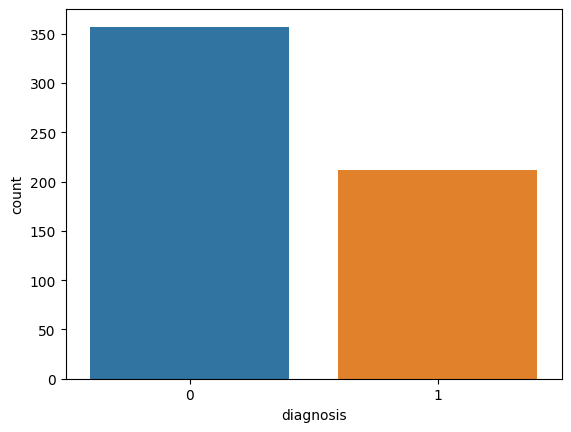

In [54]:
sns.countplot(x = df.diagnosis)
plt.show()

In [8]:
from sklearn.neighbors import LocalOutlierFactor

# split the data to X and y before Local Outlier Factorization

y=df["diagnosis"]
x=df.drop(["diagnosis"],axis=1)
columns= df.columns.tolist()

In [14]:
#exploring outliers
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in x:
    
    Q1 = x[feature].quantile(0.25)
    Q3 = x[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")


id yes
radius_mean yes
texture_mean yes
perimeter_mean yes
area_mean yes
smoothness_mean yes
compactness_mean yes
concavity_mean yes
concave points_mean yes
symmetry_mean yes
fractal_dimension_mean yes
radius_se yes
texture_se yes
perimeter_se yes
area_se yes
smoothness_se yes
compactness_se yes
concavity_se yes
concave points_se yes
symmetry_se yes
fractal_dimension_se yes
radius_worst yes
texture_worst yes
perimeter_worst yes
area_worst yes
smoothness_worst yes
compactness_worst yes
concavity_worst yes
concave points_worst no
symmetry_worst yes
fractal_dimension_worst yes


so looks like lots of our features have outliers lets plot one feature

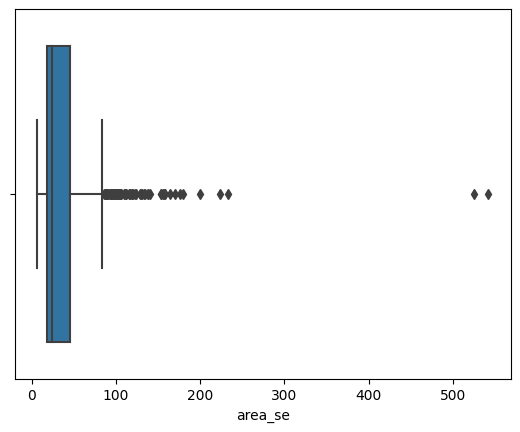

In [20]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = x["area_se"]);

In [22]:
#another try for loc trial 3
lof= LocalOutlierFactor(n_neighbors = 20)
y_pred=lof.fit_predict(x)
#y_pred[0:30]
#  1 = inlier
# -1 = outlier

In [23]:
y_pred

array([-1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1,  1

In [24]:
x_score= lof.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"]=x_score

lofthreshold= -2.5
loffilter= outlier_score["score"]< lofthreshold
outlier_index= outlier_score[loffilter].index.tolist()

In [27]:
outlier_index

[131,
 150,
 151,
 210,
 213,
 216,
 217,
 218,
 220,
 221,
 222,
 223,
 224,
 253,
 287,
 291,
 328,
 353,
 355,
 356,
 358,
 359,
 360,
 362,
 363,
 364,
 366,
 367,
 403,
 449,
 460,
 461,
 463,
 464]

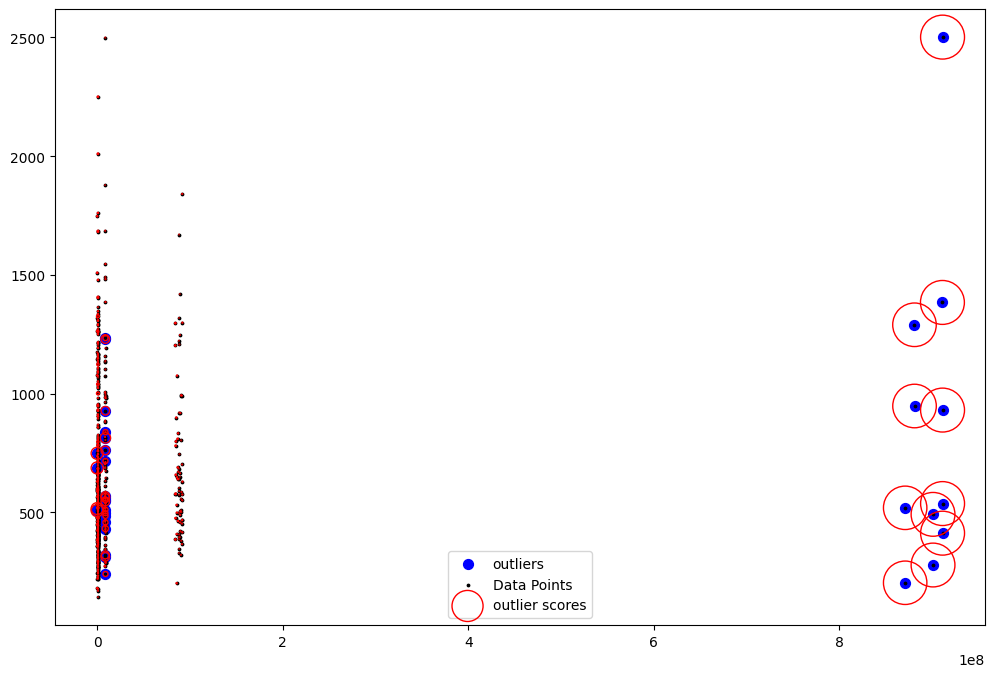

In [28]:
plt.figure(figsize=(12,8.))
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,4],color="blue",s=50,label="outliers")
plt.scatter(x.iloc[:,0],x.iloc[:,4],color="k",s=3,label="Data Points")

radius=(x_score.max()- x_score)/(x_score.max()-x_score.min())
outlier_score["radius"]=radius
plt.scatter(x.iloc[:,0],x.iloc[:,4],s=1000*radius,edgecolors="r",facecolors="none",label="outlier scores")
plt.legend();

In [30]:
X= x.drop(outlier_index)
y= y.drop(outlier_index).values

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [32]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
it looks like my data is like thos onlys

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NeighborhoodComponentsAnalysis
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Dont fit the scaler while standardizate X_test !
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
57,857793,NaN,14.71,21.59,95.55,656.9,0.11370,0.1365,0.12930,0.08123,...,17.87,30.70,115.70,985.5,0.1368,0.4290,0.3587,0.18340,0.3698,0.10940
240,88350402,NaN,13.64,15.60,87.38,575.3,0.09423,0.0663,0.04705,0.03731,...,14.85,19.05,94.11,683.4,0.1278,0.1291,0.1533,0.09222,0.2530,0.06510
24,852552,NaN,16.65,21.38,110.00,904.6,0.11210,0.1457,0.15250,0.09170,...,26.46,31.56,177.00,2215.0,0.1805,0.3578,0.4695,0.20950,0.3613,0.09564
17,84862001,NaN,16.13,20.68,108.10,798.8,0.11700,0.2022,0.17220,0.10280,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.4784,0.20730,0.3706,0.11420
215,8810987,NaN,13.86,16.93,90.96,578.9,0.10260,0.1517,0.09901,0.05602,...,15.75,26.93,104.40,750.1,0.1460,0.4370,0.4636,0.16540,0.3630,0.10590


In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix # to learn where did we wrong
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # normally "n" default value is 5.
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
score = knn.score(X_test,y_test)

print("Score",score)
print("CM",cm)
print("Basic KNN Acc",acc)

Score 0.7577639751552795
CM [[86 11]
 [28 36]]
Basic KNN Acc 0.7577639751552795


107 data predicted correctly, 1 predicted wrong from benigns
56 data predicted correctly, 7 predicted wrong from malignants

In [60]:
def KNN_Best_Params(x_train,x_test,y_train,y_test):
    
    k_range = list(range(1,10))
    weight_options = ["uniform","distance"]
    metric = ["euclidean","manhattan","minkowski"]
    
    print()
    
    param_grid = dict(n_neighbors = k_range, weights = weight_options, metric=metric)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn,param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train,y_train)
    
    print("Best training score: {} with parameters: {}".format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    return grid

In [61]:
grid = KNN_Best_Params(X_train,X_test,y_train,y_test)


Best training score: 0.8287339971550498 with parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

Test Score: 0.8012422360248447, Train Score: 1.0

CM Test:  [[85 12]
 [20 44]]
CM Train:  [[238   0]
 [  0 136]]


    cm_test = confusion_matrix(y_test, y_pred_test):Test is M: 
    cm_train = confusion_matrix(y_train, y_pred_train) 
    so basically 105 and 3 are test set which we got splitted from training set and 4 and 59 are actual diagnosis test set
   105 data predicted correctly, 3 predicted wrong from Test of training dataset and frpm actual test set 4 are wrong anf 59 are right ie M
249 data predicted correctly, 0 predicted wrong from Train ie B


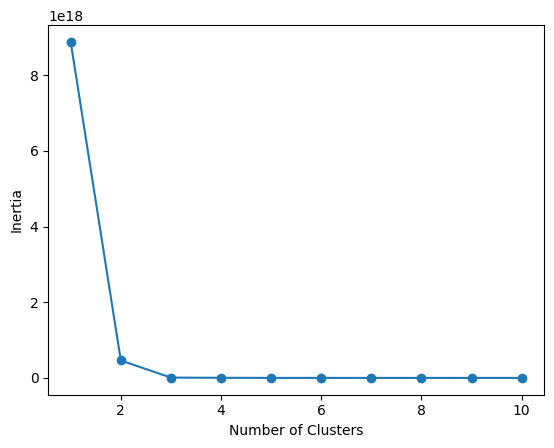

In [40]:
from sklearn.cluster import KMeans
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(x)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [50]:
#Dimentationality reduction
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

Text(0.5, 1.0, 'PCA: p1 vs p2')

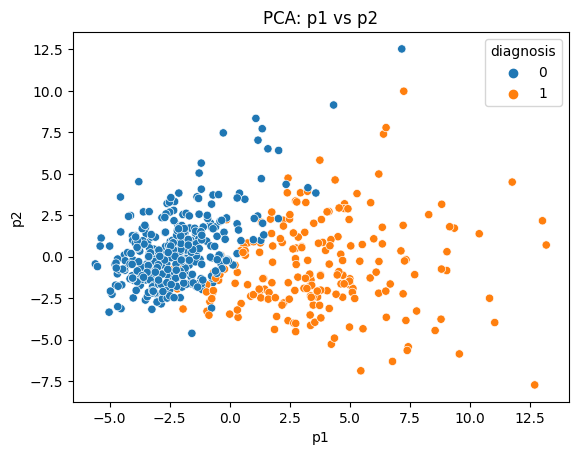

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # scaling 30 to 2
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["diagnosis"] = y

sns.scatterplot(x = "p1", y = "p2", hue = "diagnosis", data = pca_data)
plt.title("PCA: p1 vs p2")


In [52]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = test_size, random_state = 42)

In [53]:
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)


Best training score: 0.949288762446657 with parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

Test Score: 0.937888198757764, Train Score: 0.9572192513368984

CM Test:  [[92  5]
 [ 5 59]]
CM Train:  [[228  10]
 [  6 130]]


Text(0.5, 1.0, 'NCA: p1 vs p2')

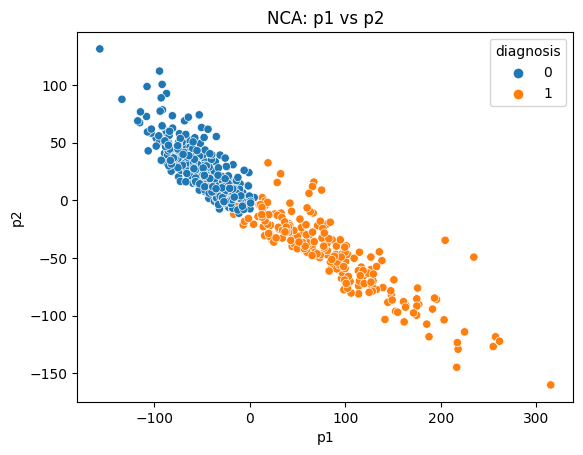

In [54]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y) # it needs a target variable unlike PCA.
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["diagnosis"] = y

sns.scatterplot(x = "p1",y = "p2", hue = "diagnosis", data = nca_data)
plt.title("NCA: p1 vs p2")


In [55]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = test_size, random_state = 42)

grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)



Best training score: 0.9945945945945945 with parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

Test Score: 0.9937888198757764, Train Score: 1.0

CM Test:  [[97  0]
 [ 1 63]]
CM Train:  [[238   0]
 [  0 136]]


Text(0.5, 1.0, "2-Class classification (K=1, weighs= 'uniform')")

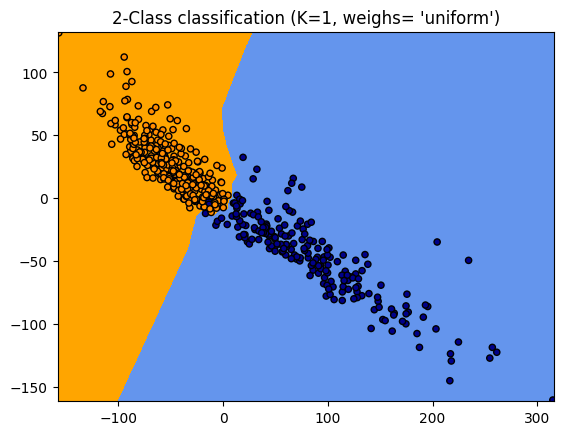

In [56]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(["orange","cornflowerblue"])
cmap_bold = ListedColormap(["darkorange","darkblue"])

h = .2 # step size in the mesh

X = X_reduced_nca
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(),yy.ravel()])

# put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# plot also the training points

plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold, edgecolor = "k", s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (K=%i, weighs= '%s')"
         % (len(np.unique(y)), grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))


In [57]:
grid = KNN_Best_Params(X_train,X_test,y_train,y_test)
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)
grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)


Best training score: 0.8287339971550498 with parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

Test Score: 0.8012422360248447, Train Score: 1.0

CM Test:  [[85 12]
 [20 44]]
CM Train:  [[238   0]
 [  0 136]]

Best training score: 0.949288762446657 with parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

Test Score: 0.937888198757764, Train Score: 0.9572192513368984

CM Test:  [[92  5]
 [ 5 59]]
CM Train:  [[228  10]
 [  6 130]]

Best training score: 0.9945945945945945 with parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

Test Score: 0.9937888198757764, Train Score: 1.0

CM Test:  [[97  0]
 [ 1 63]]
CM Train:  [[238   0]
 [  0 136]]


Text(0.5, 1.0, 'Plotting the Model Accuracies')

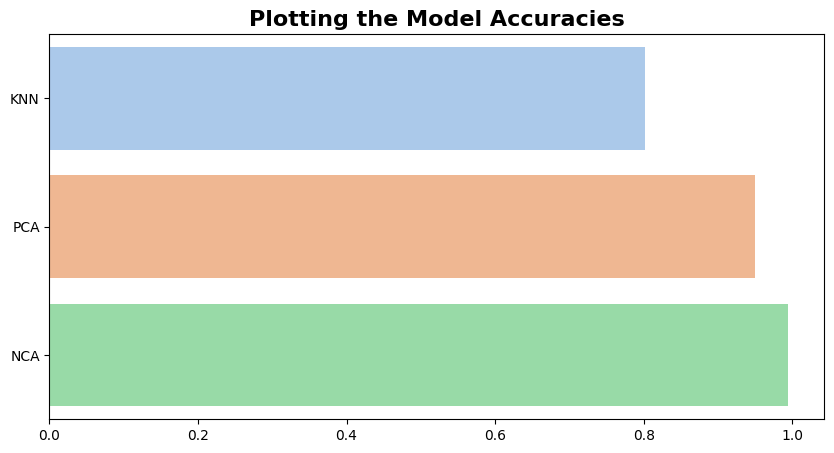

In [58]:
key = ['KNN', 'PCA','NCA']
predicted = [0.8012422360248447, 0.949288762446657,0.9937888198757764]
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key, palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

Here onward I am trying other parameters too so its just repetition of above steps


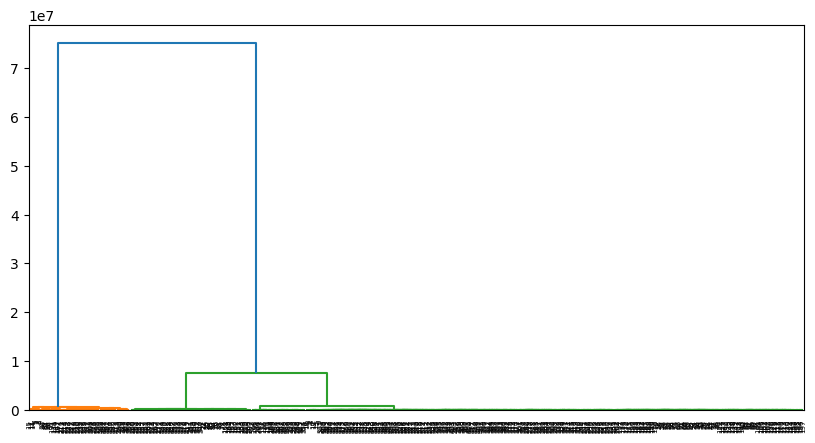

In [28]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Single linkage
plt.figure(figsize = (10,5))
mergings = linkage(x, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
#Complete Linkage
plt.figure(figsize = (20,10))
mergings = linkage(df, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()